In [10]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
# define the path for the traning and test data
data_path = 'CNNdata'
os.listdir(data_path)

['test', 'train']

In [12]:
#listing test path details
training_path = data_path+'/train'
test_path = data_path+'/test/'
os.listdir(test_path)

['without_mask', 'with_mask']

In [13]:
#Choose name of a random person without a mask from the training data
random_person_without_a_mask = random.choice(os.listdir(training_path+'/without_mask'))
random_person_without_a_mask

'64.jpg'

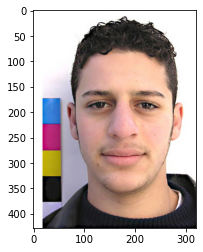

In [14]:
#Display the image using Matplotlib
without_a_mask = training_path+'/without_mask/'+random_person_without_a_mask
plt.imshow(imread(without_a_mask))

In [15]:
#Choose name of a random person with mask from the training data
random_person_with_a_mask = random.choice(os.listdir(training_path+'/with_mask'))
random_person_with_a_mask

'0_0_1 copy 34.jpg'

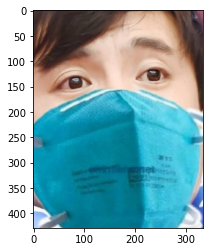

In [16]:
#Display the image using Matplotlib
with_a_mask = training_path+'/with_mask/'+random_person_with_a_mask
plt.imshow(imread(with_a_mask))

In [17]:
# Infected training size
len(os.listdir(training_path+'/without_mask'))

1918

In [18]:
# Uninfected training size
len(os.listdir(training_path+'/with_mask'))

1918

In [21]:
imread(without_a_mask).shape

(428, 320, 3)

In [23]:
height=[]
width=[]
for image in os.listdir(test_path+'/with_mask'):
    image = imread(test_path+'/with_mask/'+image)
    h, w, colors = image.shape
    height.append(h)
    width.append(w)

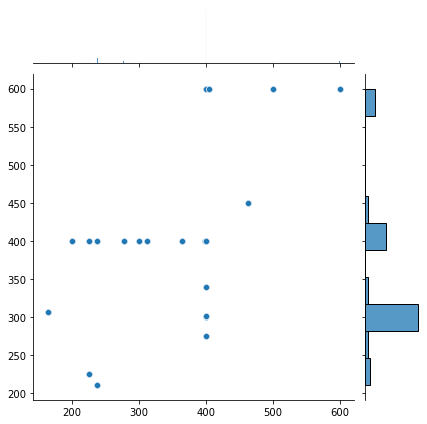

In [24]:
sns.jointplot(x=height, y=width)
plt.show()

In [25]:
np.mean(height)

373.4146341463415

In [26]:
np.mean(width)

351.9024390243902

In [29]:
image_shape = (373, 351, 3)

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
image_generator = ImageDataGenerator(rotation_range=20, #Rotate image by 20 degrees
                                     width_shift_range=0.1, #Shift the image width by max of 10%
                                     height_shift_range=0.1, #Shift the image height by max of 10%
                                     rescale=1/255, # Rescale the image by normalizing it
                                     shear_range=0.1, # Shear mean cutting away portion of the image (max 10%)
                                     zoom_range=0.1, # Zoom by max 10%
                                     horizontal_flip=True, # Allow image flipping
                                     fill_mode='nearest' # Fill in the missing pixels with the nearest filled value.
                                    )

In [6]:
import tensorflow as tf

In [32]:
image_generator.flow_from_directory(training_path)

Found 3836 images belonging to 2 classes.


In [33]:
image_generator.flow_from_directory(test_path)

Found 328 images belonging to 2 classes.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Dropout, Flatten

In [35]:
model=Sequential()
# 1st convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1))
# 2nd convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1))
# 3rd convolutuional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 371, 349, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 370, 348, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 368, 346, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 367, 345, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 365, 343, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 364, 342, 64)     0

In [39]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='softmax'))

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[7967232,128] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:StatelessRandomUniformV2]

In [38]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [40]:
odel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NameError: name 'odel' is not defined

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=4)

In [ ]:
%%time
results = model.fit(train_image_gen,epochs=10,
                              validation_data=test_image_gen,
                              callbacks=[early_stop]
                             )